<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv4/blob/main/KDE0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

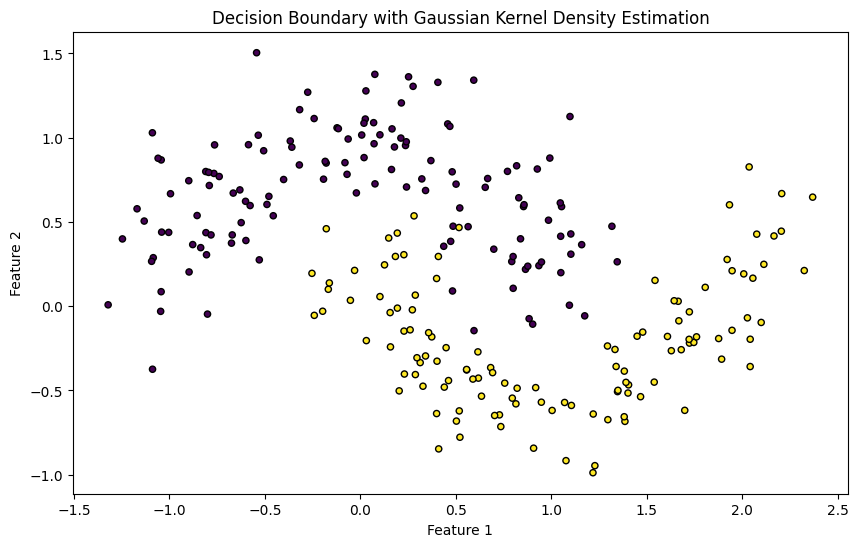

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate the dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
def KDE(x, centers, bandwidth,kernel):

    n_samples, n_features = X.shape
    n_train_samples = centers.shape[0]
    u = np.abs(x[:, None, :] - centers)

    if kernel == 'gaussian':
        scores = (np.exp(-0.5 * np.sum(u**2, axis=-1) / bandwidth**2)).mean(axis=1)
        normalization_constant = (2 * np.pi * bandwidth**2) ** (n_features / 2)
    else :
        scores = (np.exp(-np.sum(u, axis=-1) / bandwidth)).mean(axis=1)
        normalization_constant = (2 * bandwidth) ** n_features



    return scores / normalization_constant

Accuracy: 0.96


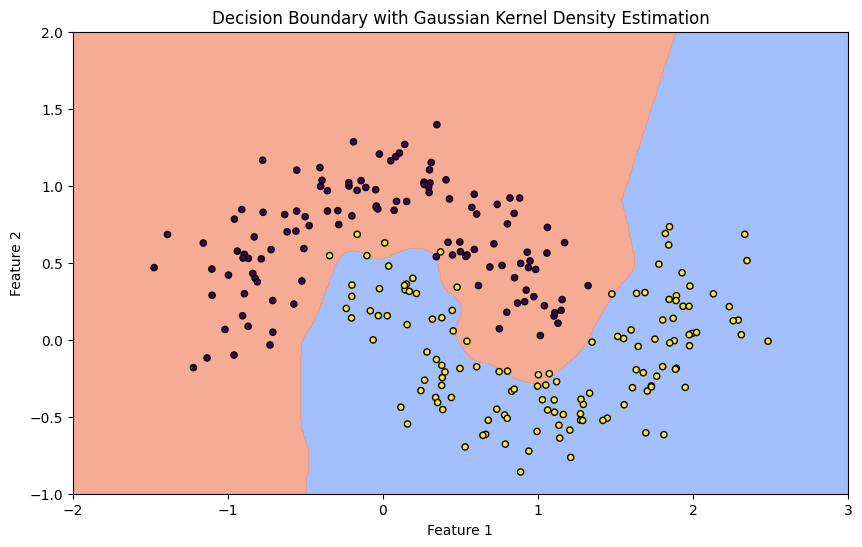

In [5]:
bandwidth = 0.1
kernel = 'gaussian'

# Compute density scores for the test set
dens_benign = KDE(X_test, X_train[y_train == 0], bandwidth,kernel)
dens_malware = KDE(X_test, X_train[y_train == 1], bandwidth,kernel)

# Step 3: Classify samples based on KDE
y_pred = np.where(dens_benign > dens_malware, 0, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the dataset and decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_malware_grid = KDE(grid, X_train[y_train == 1], bandwidth,kernel)

decision = dens_benign_grid > dens_malware_grid
decision = decision.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision, cmap='coolwarm', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.title("Decision Boundary with Gaussian Kernel Density Estimation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [6]:
bens = X_test[y_test==0]
mals = X_test[y_test==1]
print(KDE(bens[:10], X_train[y_train == 0], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 0], bandwidth,kernel))

[0.16745188 0.39360079 0.06494617 0.51548803 0.58693027 0.4862779
 0.59613488 0.6637984  0.15854465 0.3786144 ]
[7.86830622e-02 1.19728563e-02 1.37700677e-02 8.67182644e-07
 2.69871109e-03 1.45121715e-02 1.99855107e-09 3.27774634e-04
 1.20052330e-01 1.89819387e-09]


In [7]:
print(KDE(bens[:10], X_train[y_train == 1], bandwidth,kernel))
print(KDE(mals[:10], X_train[y_train == 1], bandwidth,kernel))

[2.08782213e-16 9.19191464e-13 2.93211211e-06 1.60756245e-09
 2.93846441e-11 5.51934740e-05 9.28557245e-07 2.20695066e-05
 5.92545228e-10 8.98505214e-02]
[0.28907099 0.48629564 0.50581022 0.43667621 0.8752931  0.67194301
 0.49151525 0.83200071 0.20896334 0.29625987]


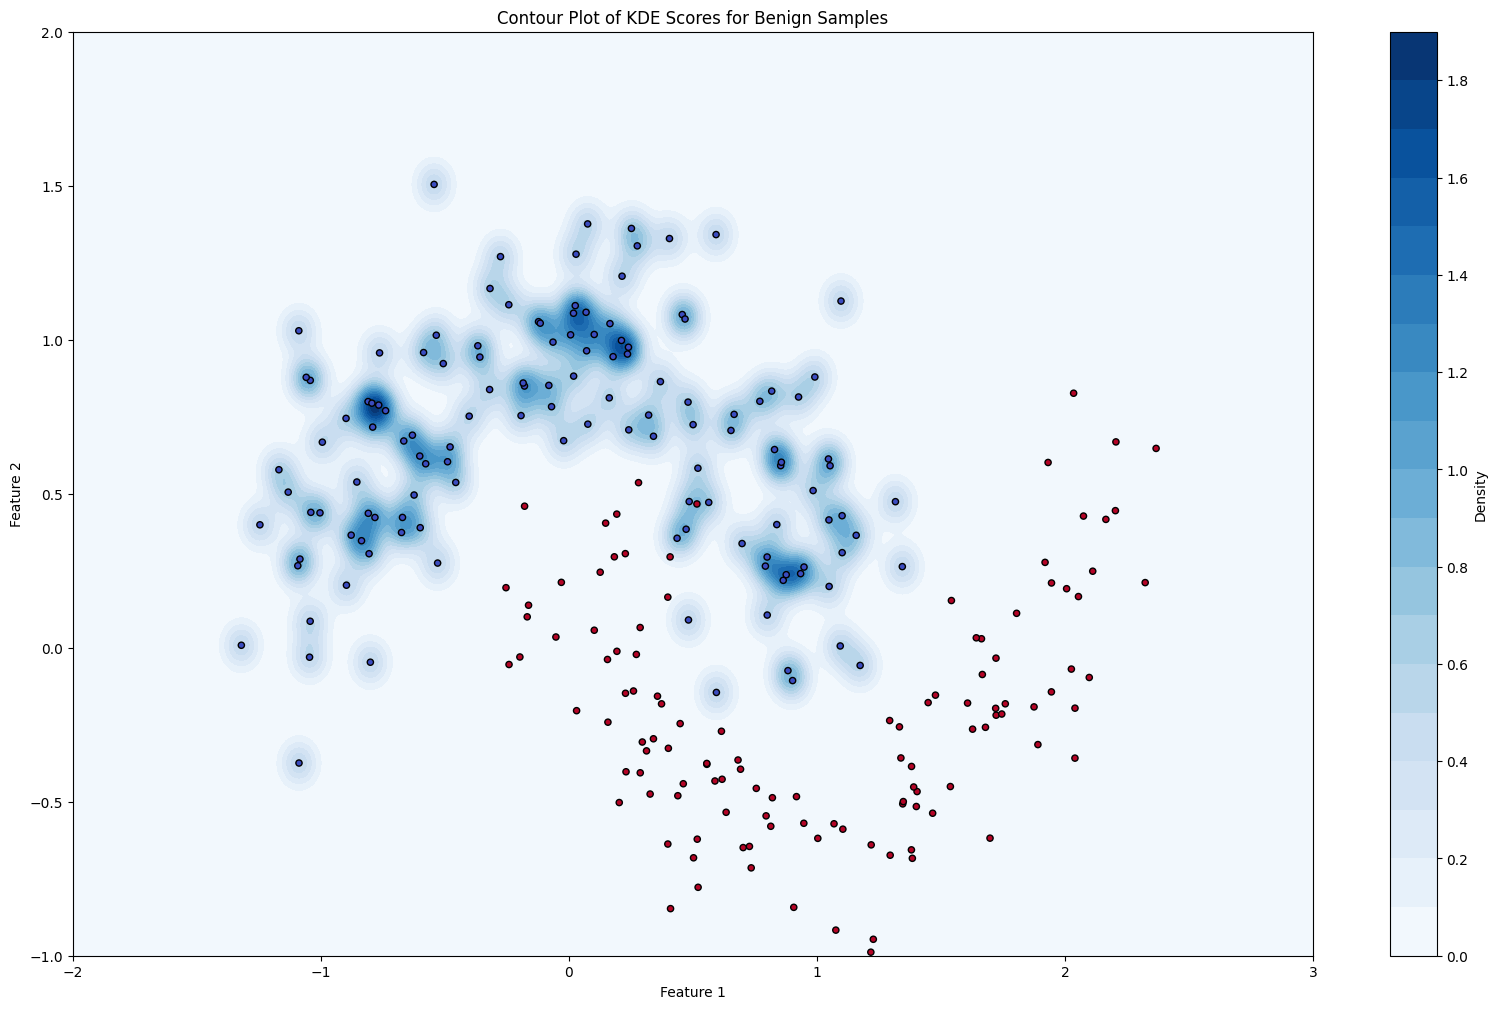

In [8]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

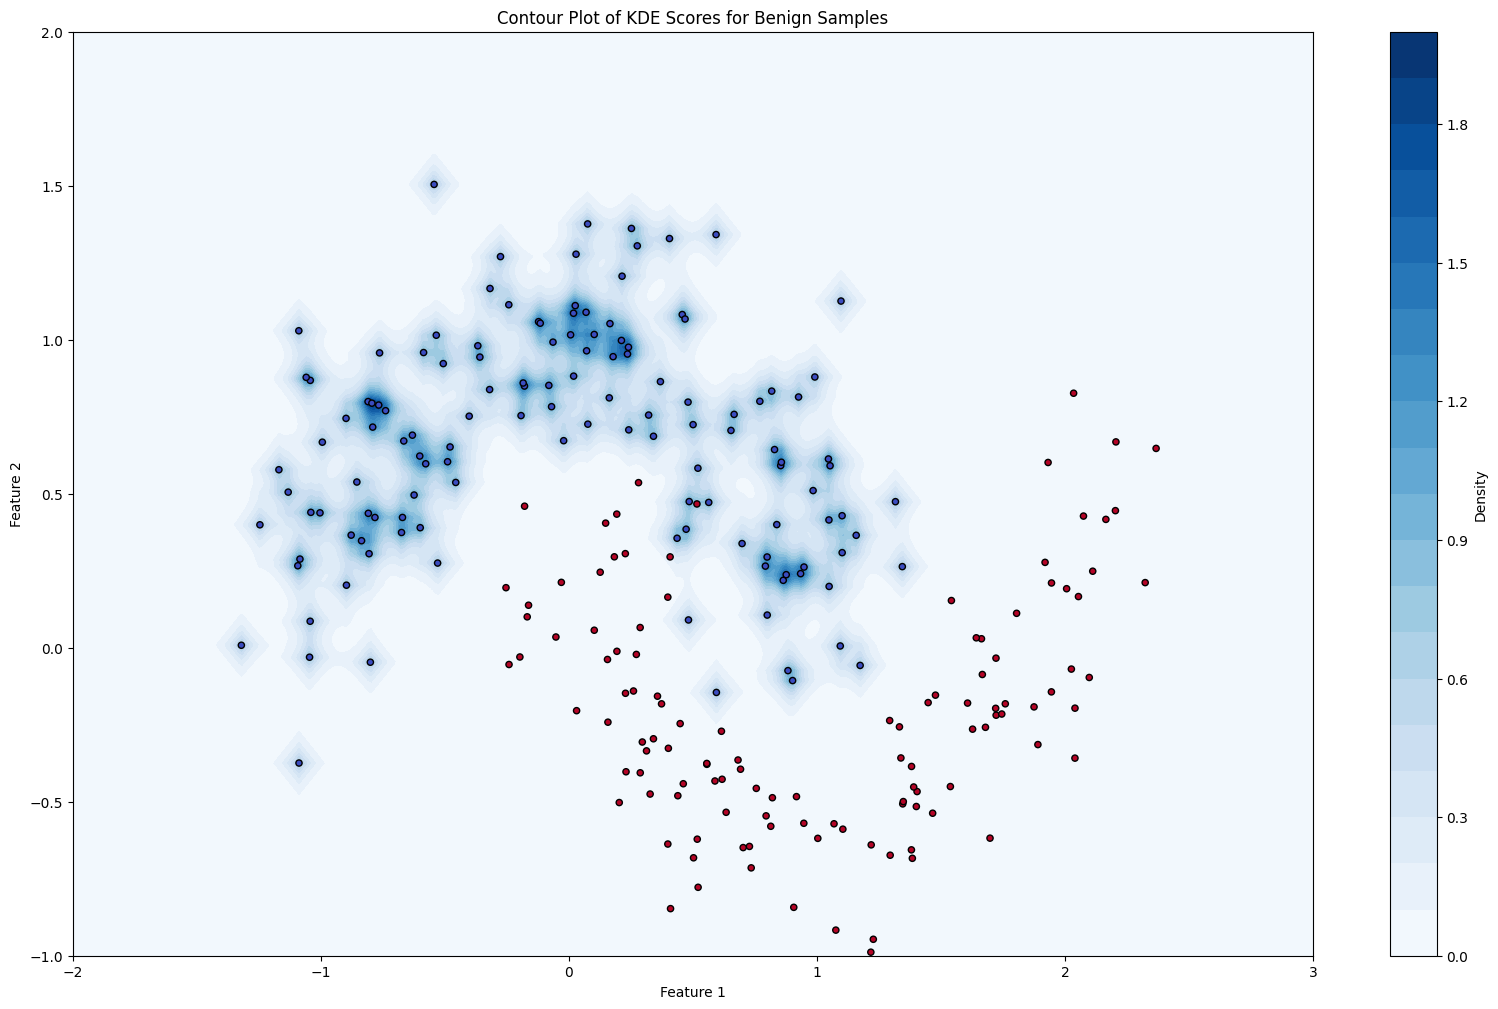

In [9]:
# Fit KDE model for benign class
bandwidth = 0.05
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

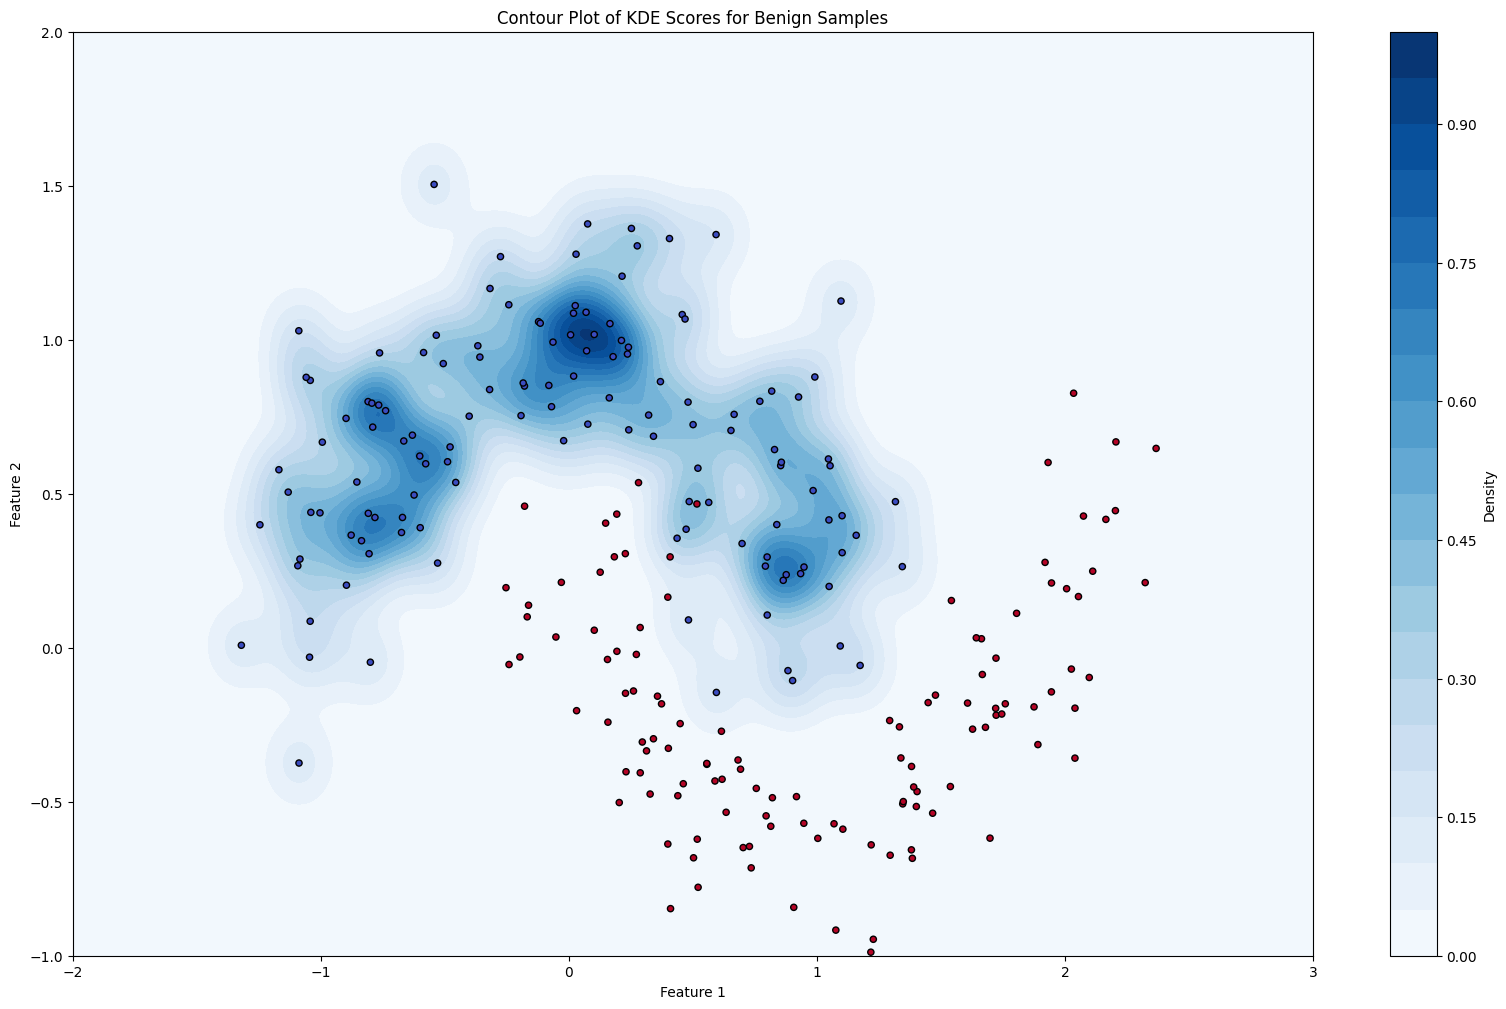

In [10]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

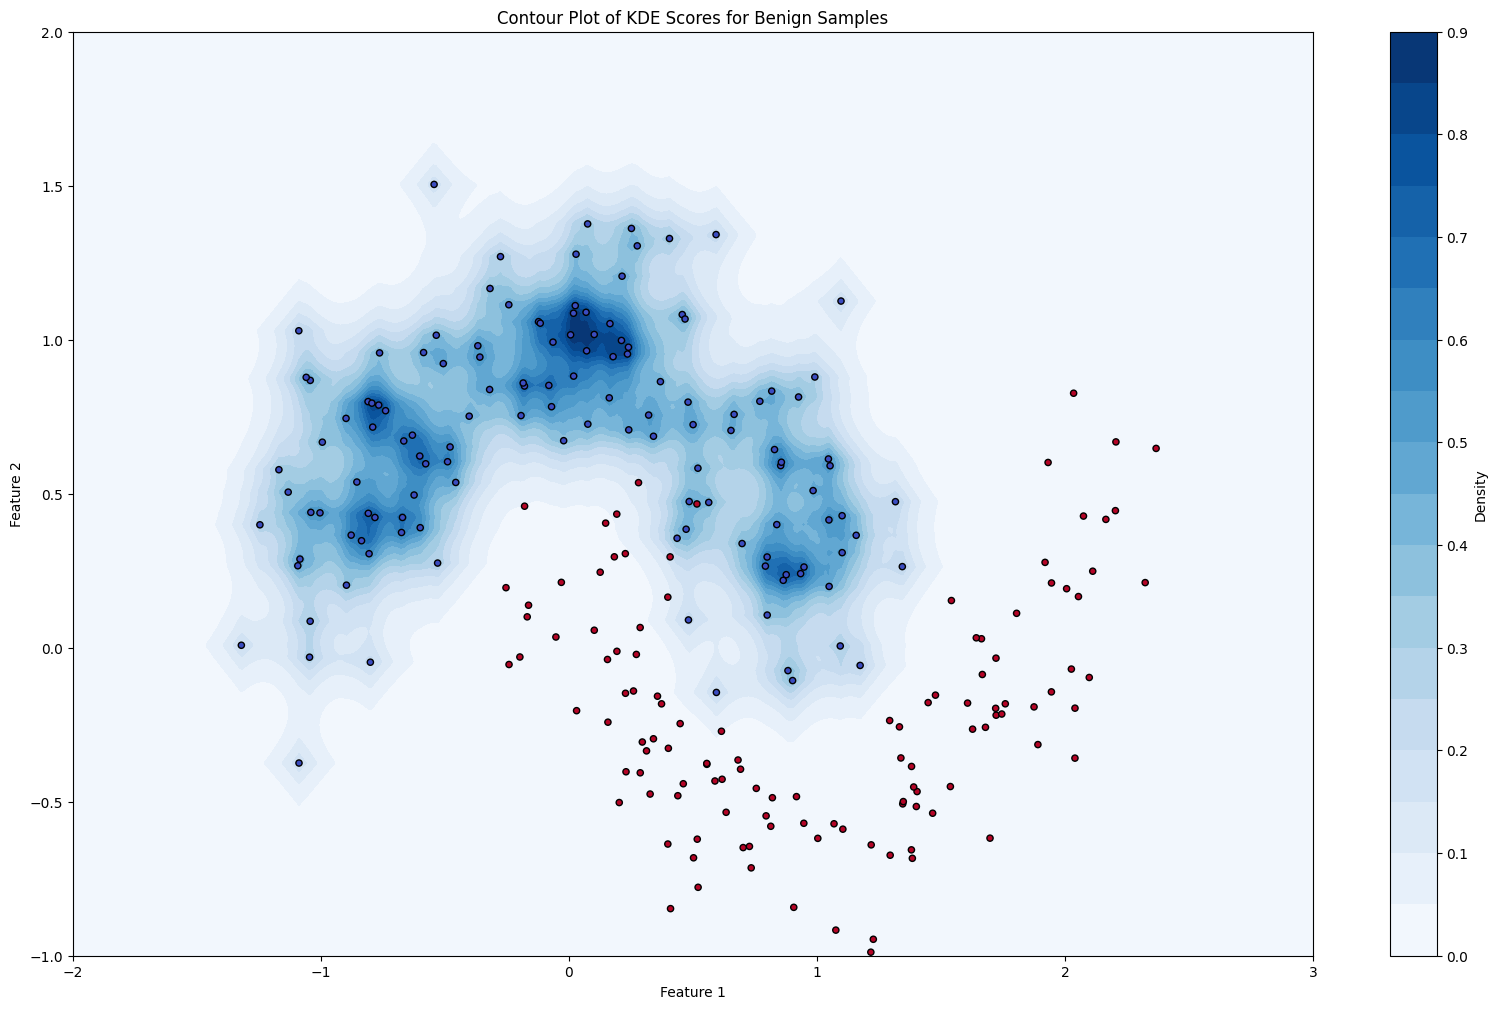

In [11]:
# Fit KDE model for benign class
bandwidth = 0.1
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

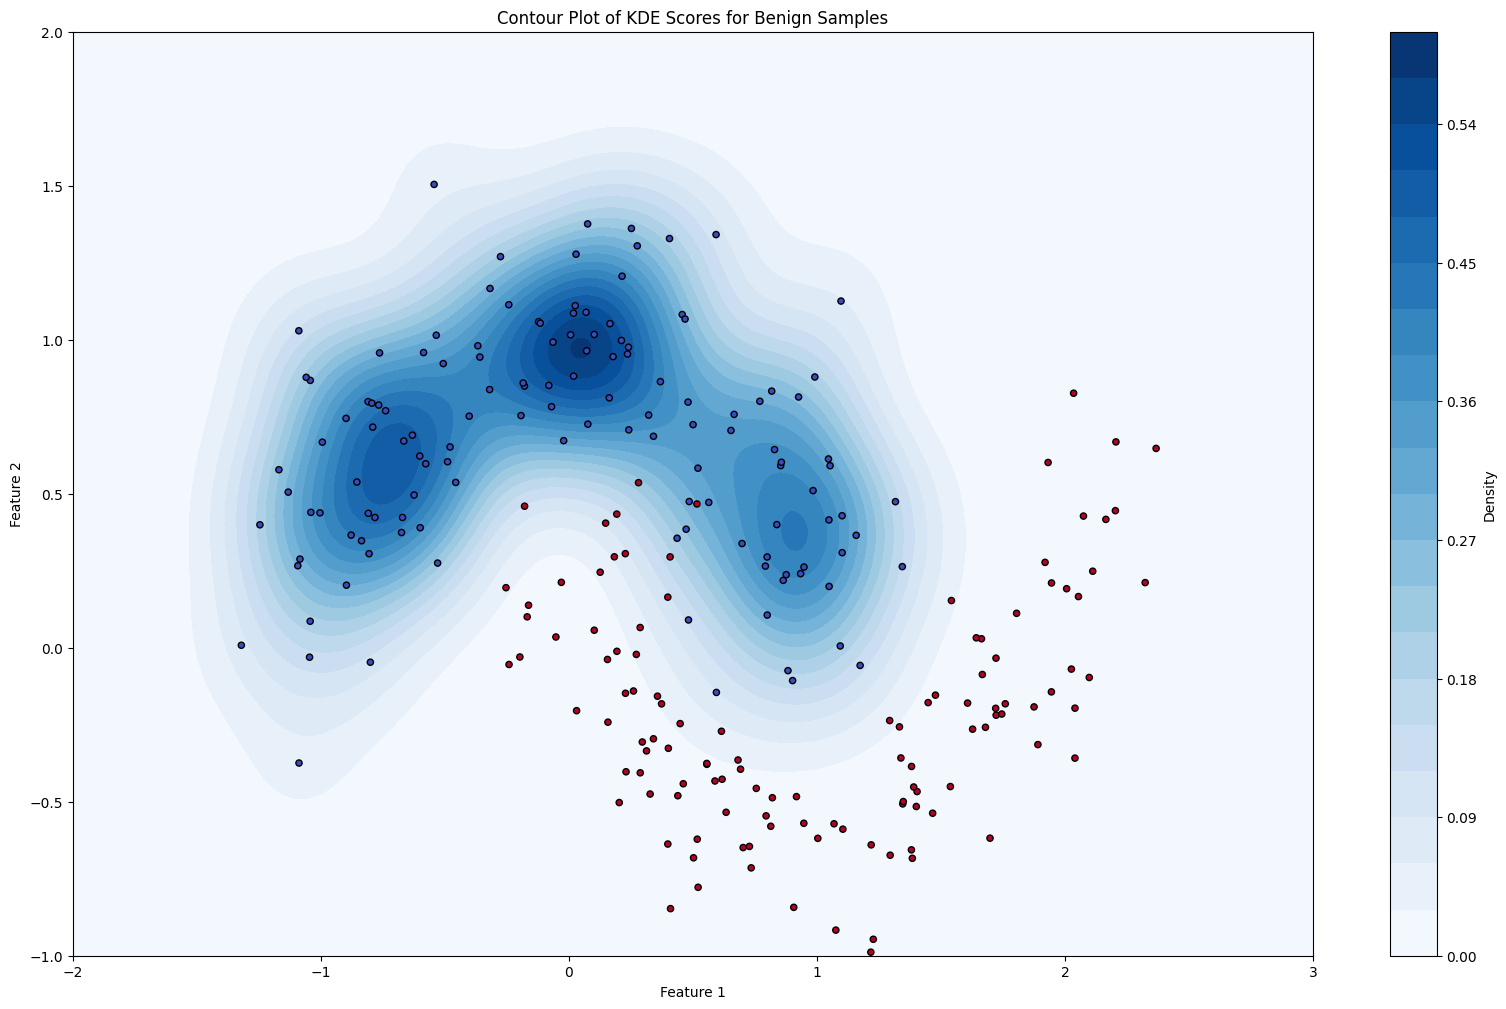

In [13]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

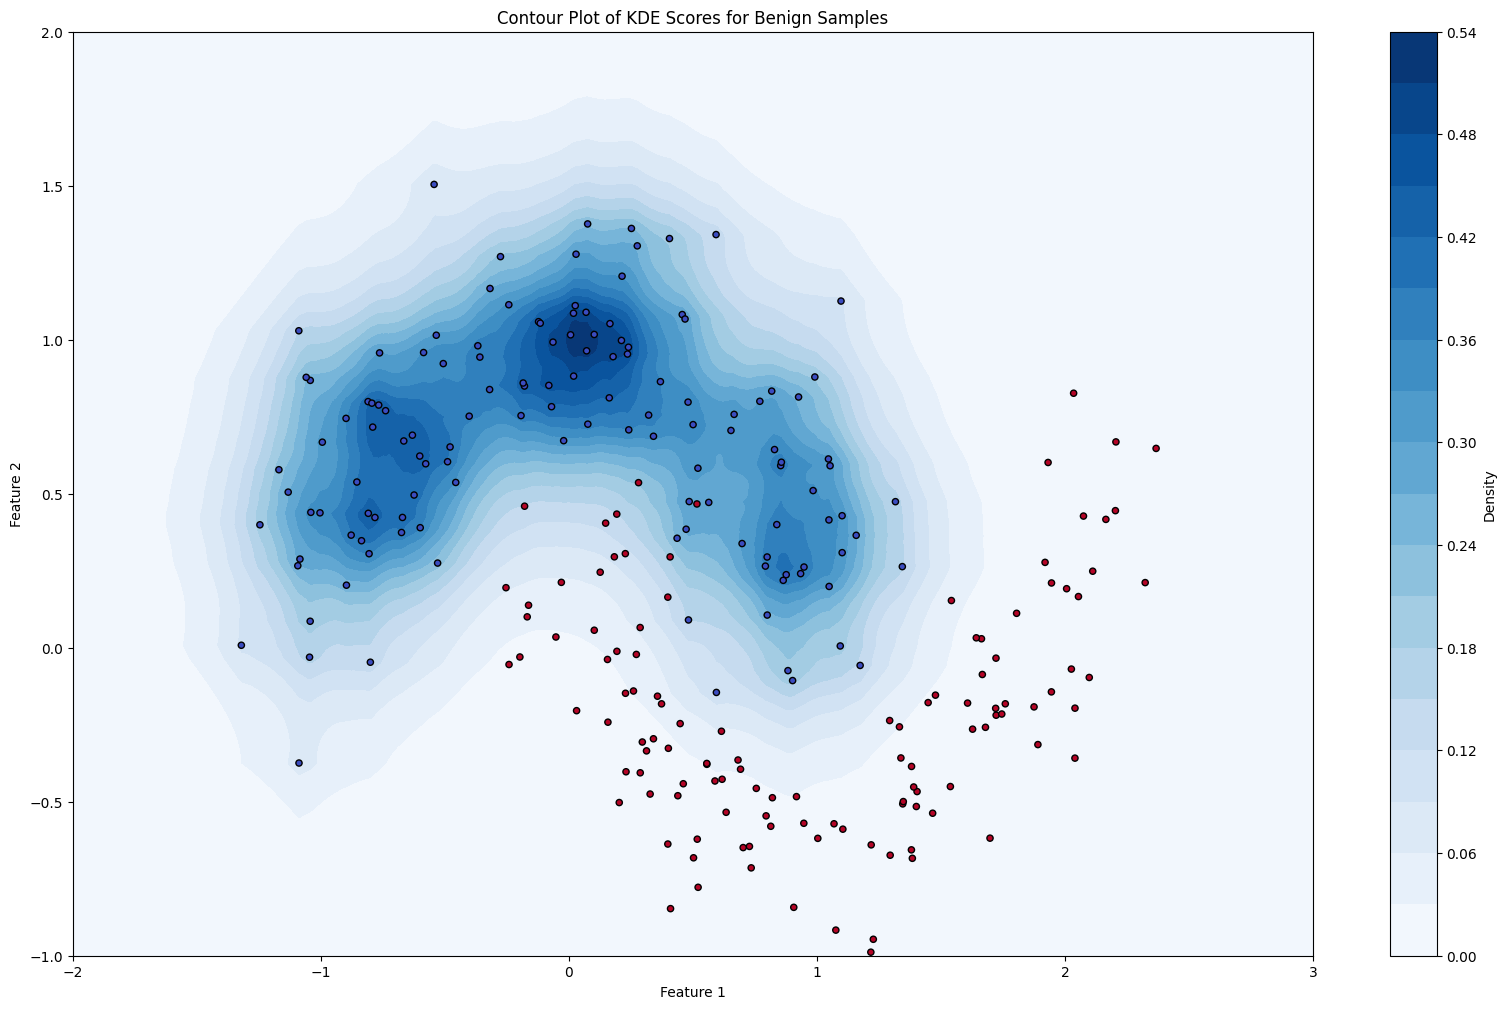

In [14]:
# Fit KDE model for benign class
bandwidth = 0.2
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

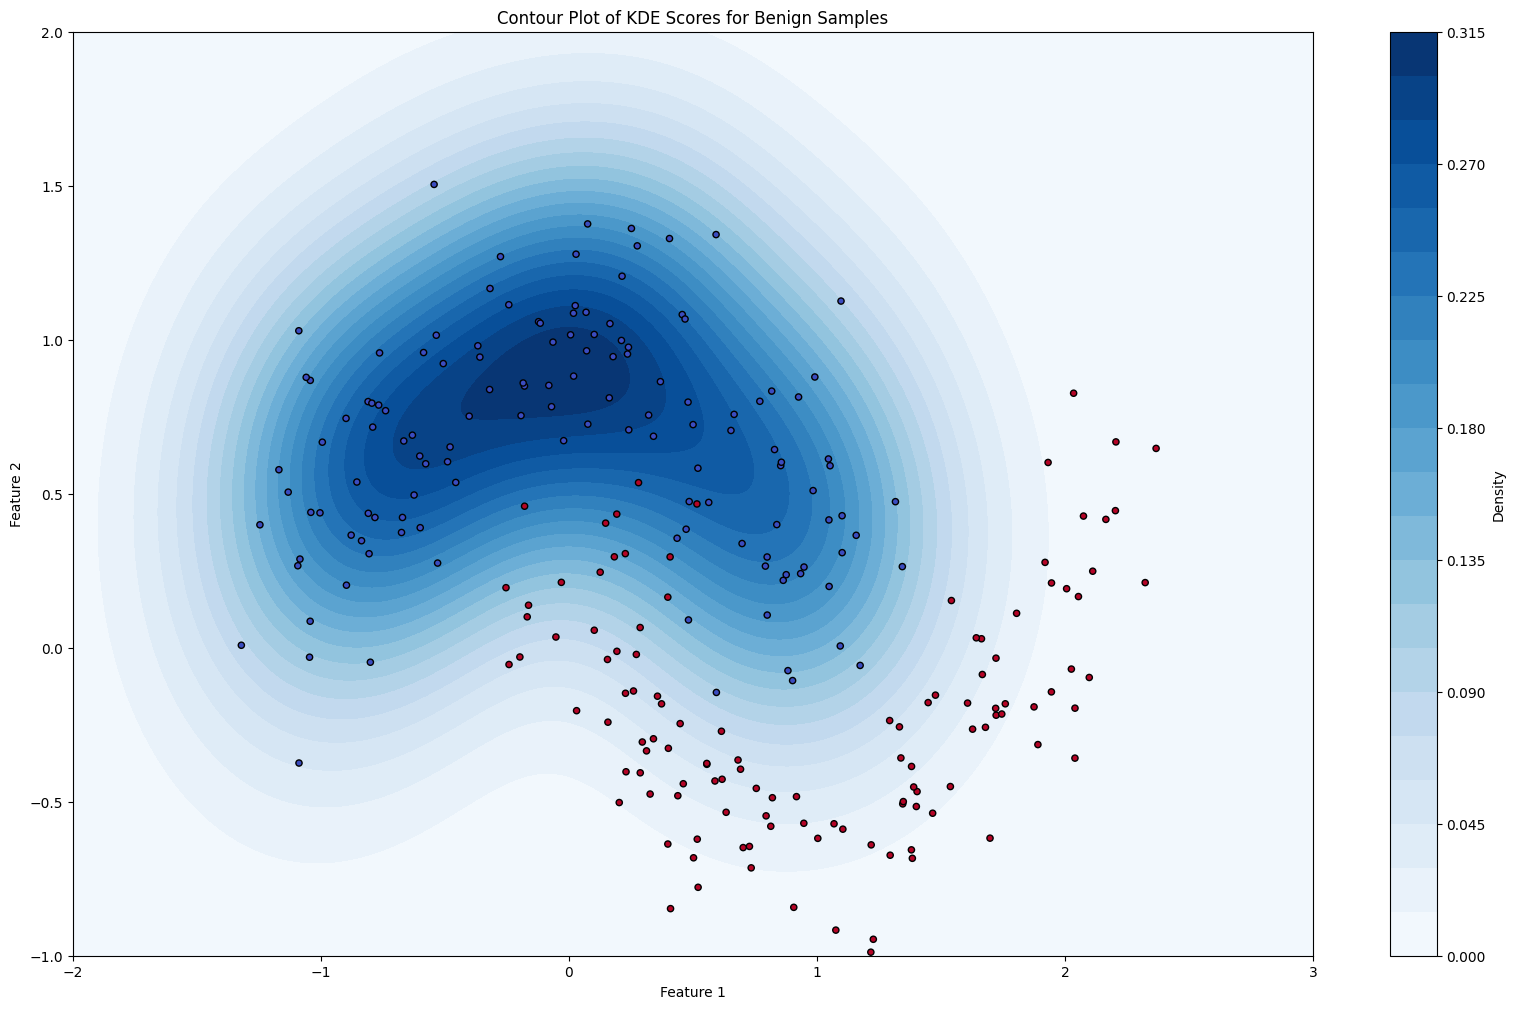

In [15]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'gaussian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

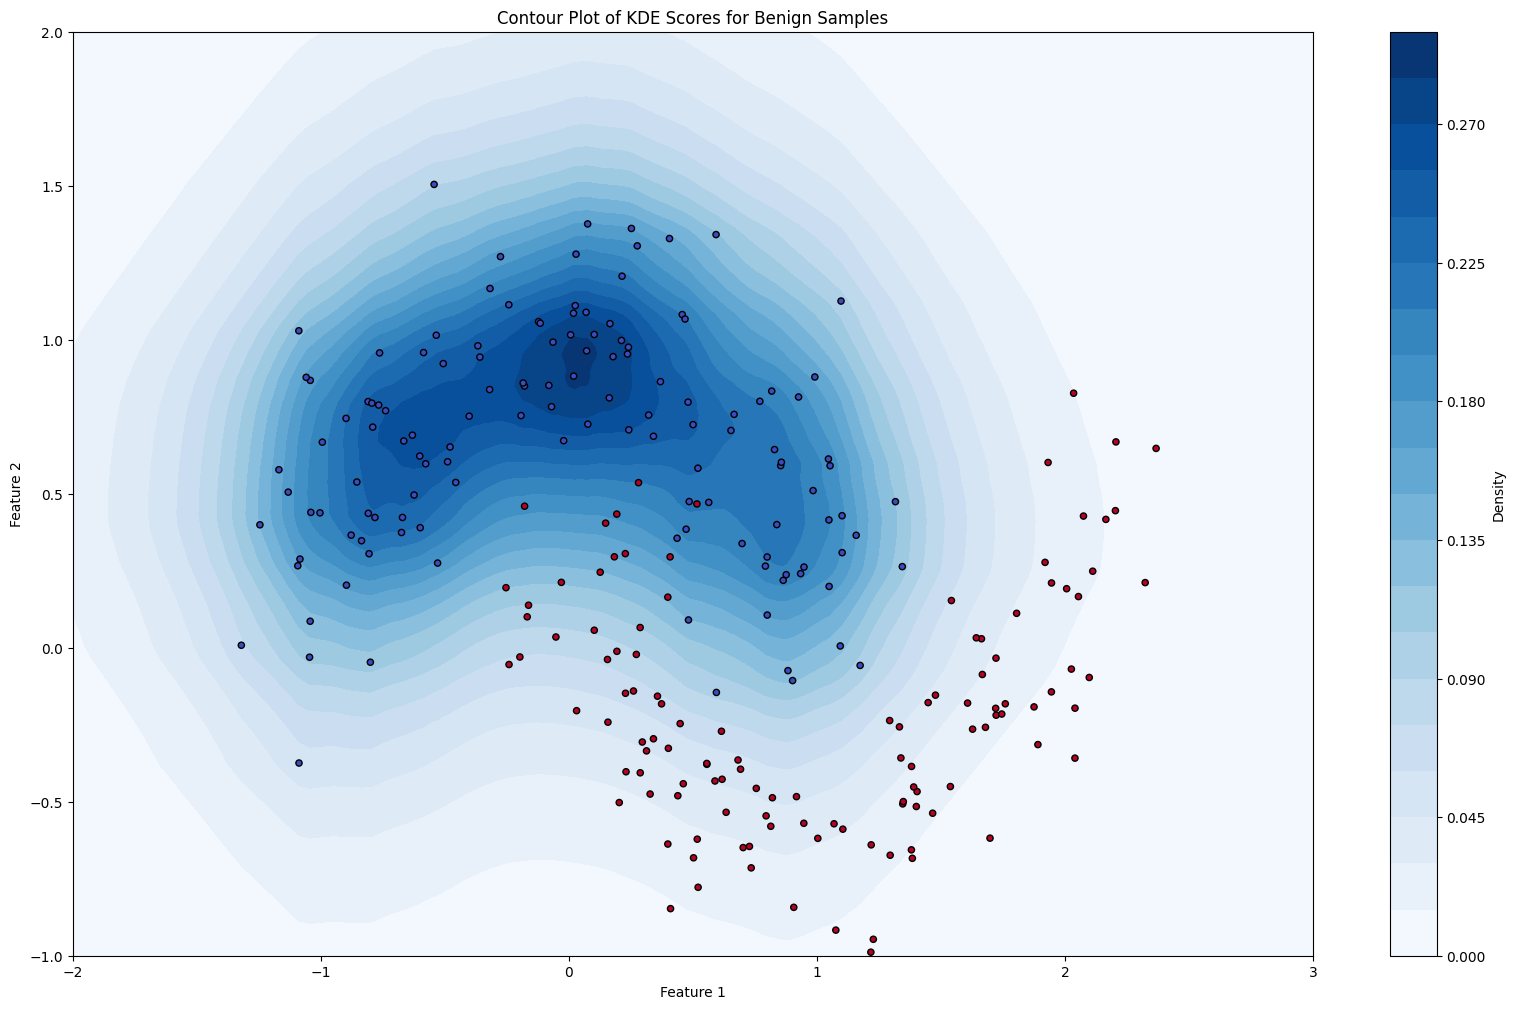

In [16]:
# Fit KDE model for benign class
bandwidth = 0.4
kernel = 'laplacian'

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density estimates for the grid points
dens_benign_grid = KDE(grid, X_train[y_train == 0], bandwidth,kernel)
dens_benign_grid = dens_benign_grid.reshape(xx.shape)

# Plot the contour of the score for kde_benign
plt.figure(figsize=(20, 12))
plt.contourf(xx, yy, dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores for Benign Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Gradients

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,balanced_accuracy_score
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pickle
import random
import time


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_losses(loss1, loss2, loss3, loss4):
    """
    Plots three lists of loss values against iterations using seaborn.

    Parameters:
    loss1 (list): First list of loss values.
    loss2 (list): Second list of loss values.
    loss3 (list): Third list of loss values.
    loss4 (list): Third list of loss values.
    """
    # Create a list of iterations based on the length of the loss lists
    iterations = list(range(1, len(loss1) + 1))

    # Create a DataFrame
    data = pd.DataFrame({
        'Iteration': iterations * 4,
        'Loss': loss1 + loss2 + loss3 + loss4,
        'Type': ['Loss1'] * len(loss1) + ['Loss2'] * len(loss2) + ['Loss3'] * len(loss3)+ ['Loss4'] * len(loss4)
    })

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Iteration', y='Loss', hue='Type')
    plt.title('Loss vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend(title='Loss Type')
    plt.grid(True)
    plt.show()



In [19]:
def KDE(x, centers, bandwidth, kernel='laplacian'):
    n_samples, n_features = x.shape
    n_train_samples = centers.shape[0]
    u = torch.abs(x[:, None, :] - centers)

    if kernel == 'gaussian':
        scores = torch.exp(-0.5 * torch.sum(u**2, dim=-1) / bandwidth**2).mean(dim=1)
        normalization_constant = (2 * torch.pi * bandwidth**2) ** (n_features / 2)
    elif kernel == 'laplacian':
        scores = torch.exp(-torch.sum(u, dim=-1) / bandwidth).mean(dim=1)
        normalization_constant = (2 * bandwidth) ** n_features
    else:
        raise ValueError("Unsupported kernel. Use 'gaussian' or 'laplacian'.")

    return scores / normalization_constant

def pgd(x, centers, criterion, bandwidth, kernel, step_length=0.02, k=100, norm='linf'):
    eps = 1e-10
    x_next = x.clone()

    trajectories = [x_next.clone().detach().cpu().numpy()]
    loss_steps_i = []

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)
        k = KDE(x_var, centers, bandwidth, kernel)
        if criterion == 'log':
            loss = -torch.log(k + eps)
        else:
            loss = -k

        loss_steps_i.append(k.mean().detach().item())

        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'free':
            perturbation = gradients
        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = x_next + step_length * perturbation
        trajectories.append(x_next.clone().detach().cpu().numpy())

    return x_next, loss_steps_i, np.array(trajectories)

In [20]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

bens = X_test_tensor[y_test==0]
mals = X_test_tensor[y_test==1]

In [21]:
x_next, loss_steps_i, trajectories = pgd(mals,X_train_tensor[y_train==0],'log', 0.1,'gaussian',step_length=0.01, k=100, norm='linf')
x_next2,loss_steps_i2, trajectories2 = pgd(mals,X_train_tensor[y_train==0],'linear', 0.1,'gaussian',step_length=0.01, k=100, norm='linf')

In [22]:
KDE(mals[:20], X_train_tensor[y_train==0], 0.1,'gaussian')

tensor([7.8683e-02, 1.1973e-02, 1.3770e-02, 8.6718e-07, 2.6987e-03, 1.4512e-02,
        1.9986e-09, 3.2777e-04, 1.2005e-01, 1.8982e-09, 6.6515e-12, 5.9871e-04,
        2.3926e-01, 4.3684e-25, 1.1875e-01, 6.4138e-02, 9.7619e-03, 6.5637e-10,
        1.1498e-09, 4.7361e-14])

In [23]:
KDE(x_next[:20], X_train_tensor[y_train==0], 0.1,'gaussian')

tensor([0.4372, 0.9571, 0.4370, 0.2715, 0.1294, 0.1322, 0.7289, 0.1327, 0.1293,
        0.7302, 0.5904, 0.7292, 0.9560, 0.1798, 0.1326, 0.9550, 0.1325, 0.7300,
        0.7311, 0.2393])

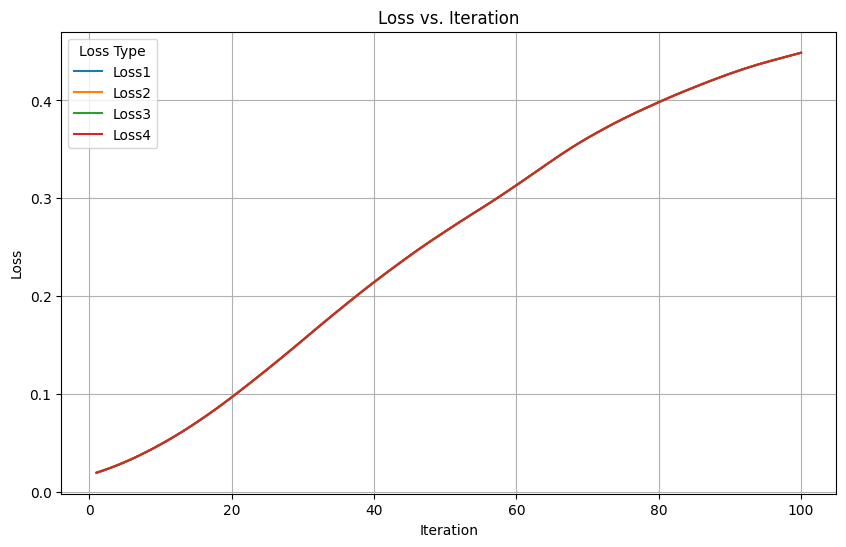

In [24]:
plot_losses(loss_steps_i, loss_steps_i2, loss_steps_i2, loss_steps_i2)

In [25]:
x_next,loss_steps_i, trajectories = pgd(mals,X_train_tensor[y_train==0],'log', 1.,'gaussian',step_length=0.01, k=100, norm='free')
x_next2,loss_steps_i2, trajectories = pgd(mals,X_train_tensor[y_train==0],'linear', 1.,'gaussian',step_length=0.01, k=100, norm='free')

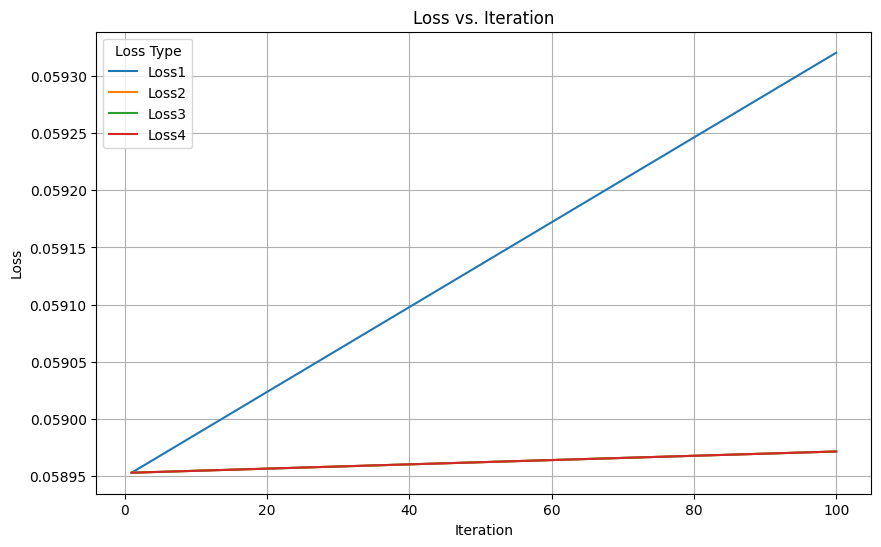

In [26]:
plot_losses(loss_steps_i, loss_steps_i2, loss_steps_i2, loss_steps_i2)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


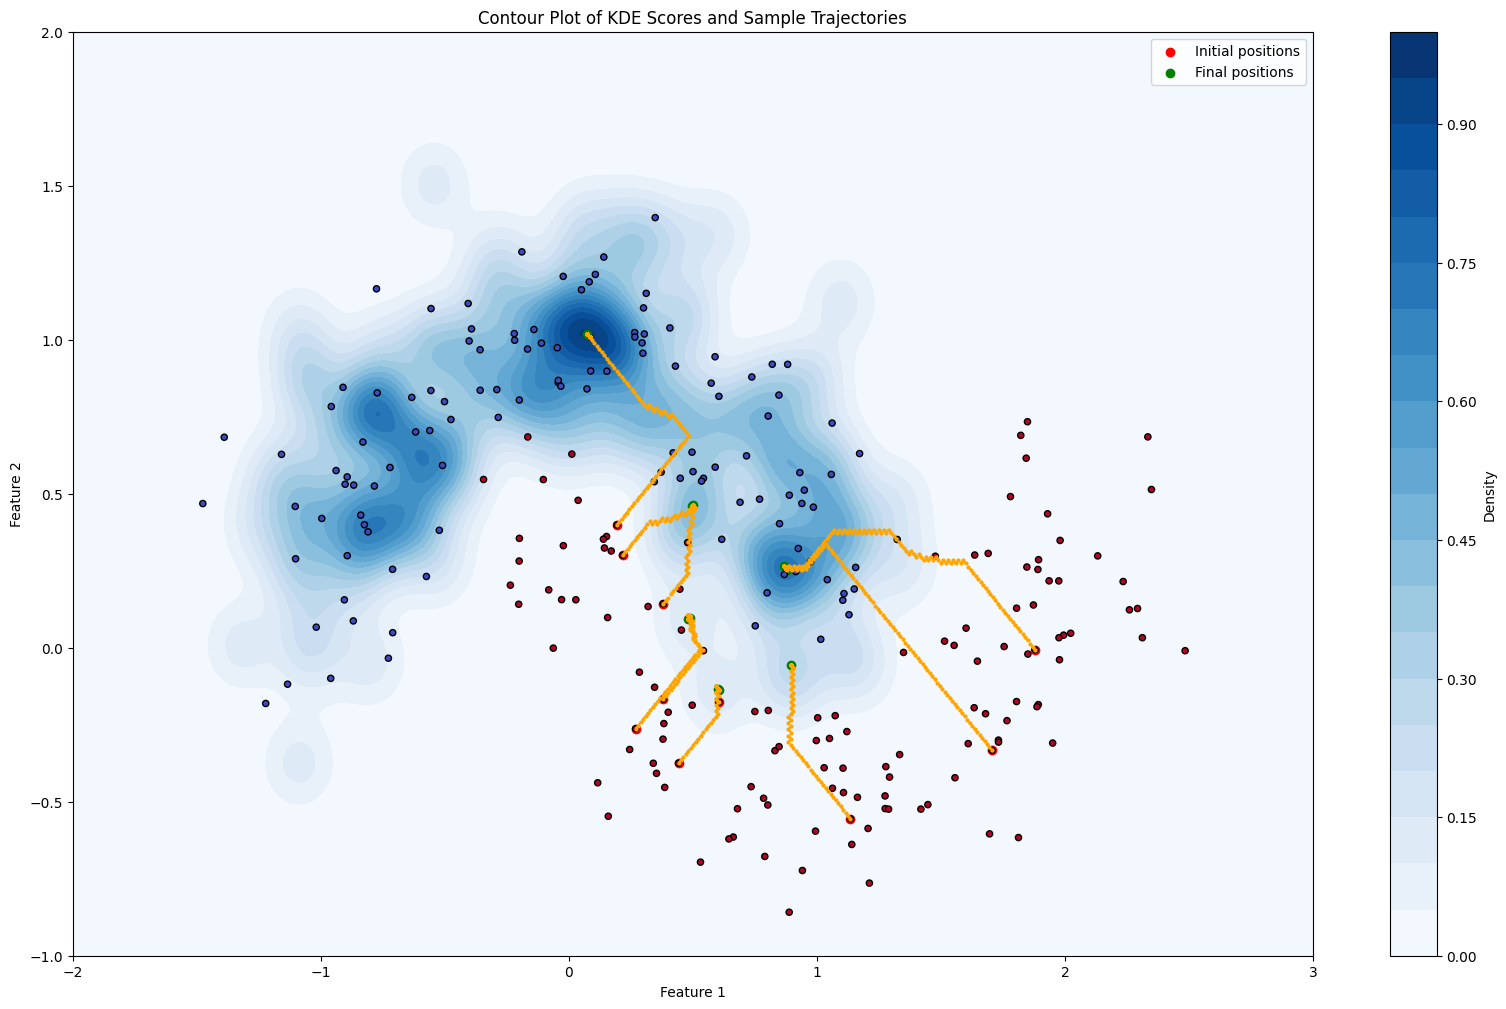

In [27]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


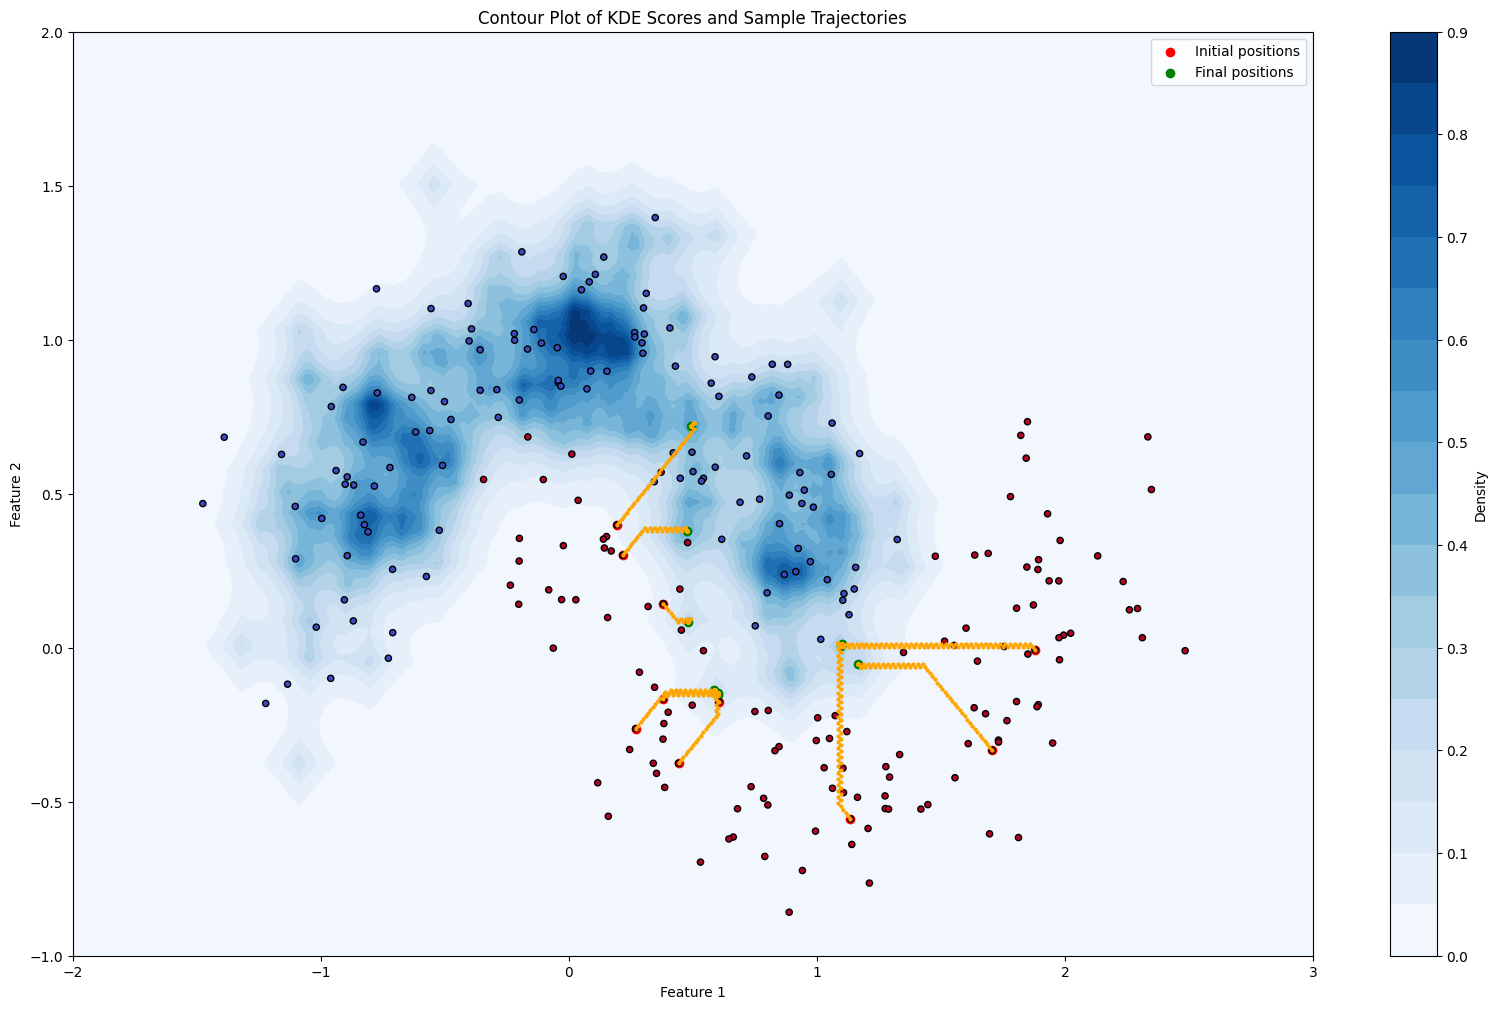

In [30]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='laplacian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'linear', bandwidth, 'laplacian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


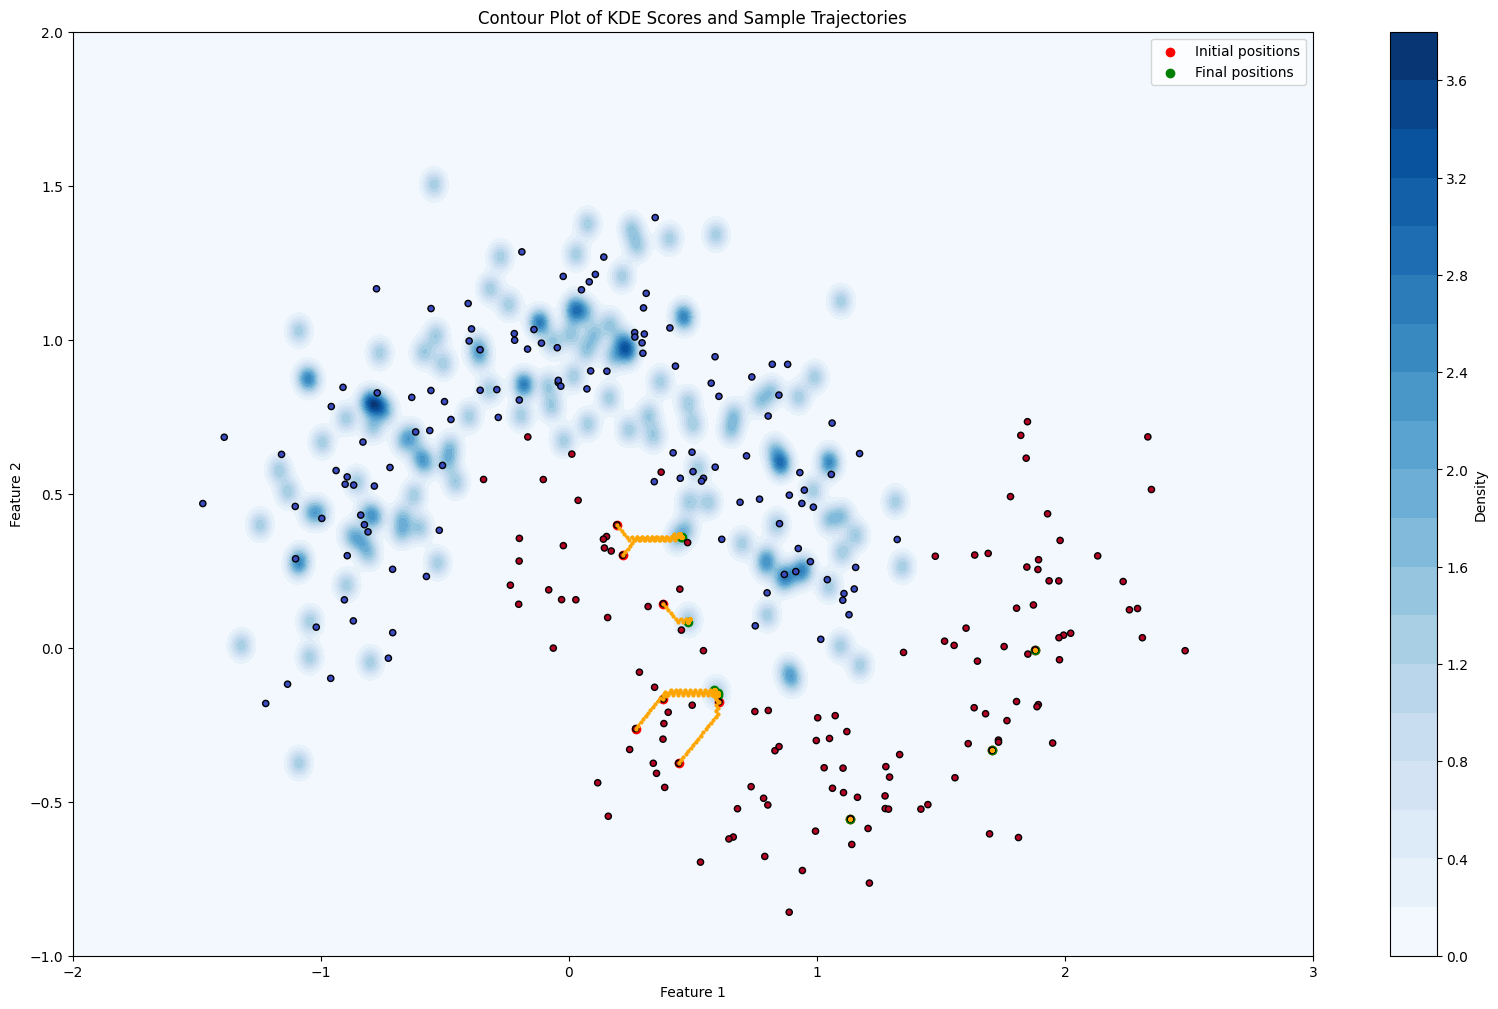

In [31]:
# Fit KDE model for benign class
bandwidth = 0.03
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


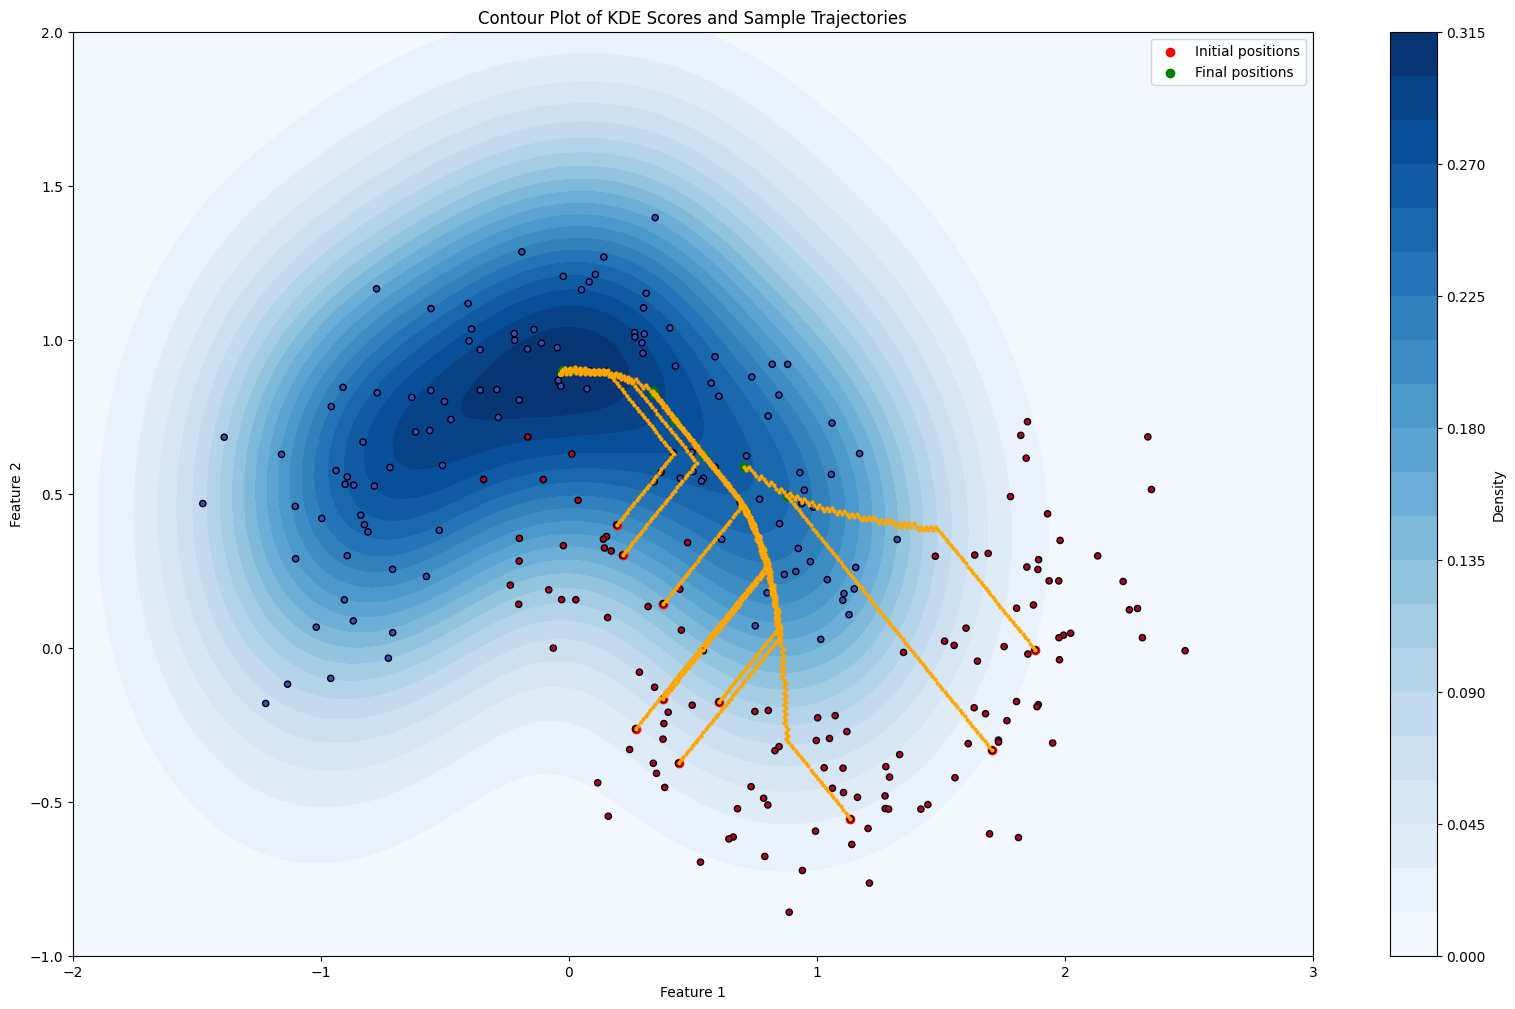

In [33]:
# Fit KDE model for benign class
bandwidth = 0.4
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.01, k=100, norm='linf')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


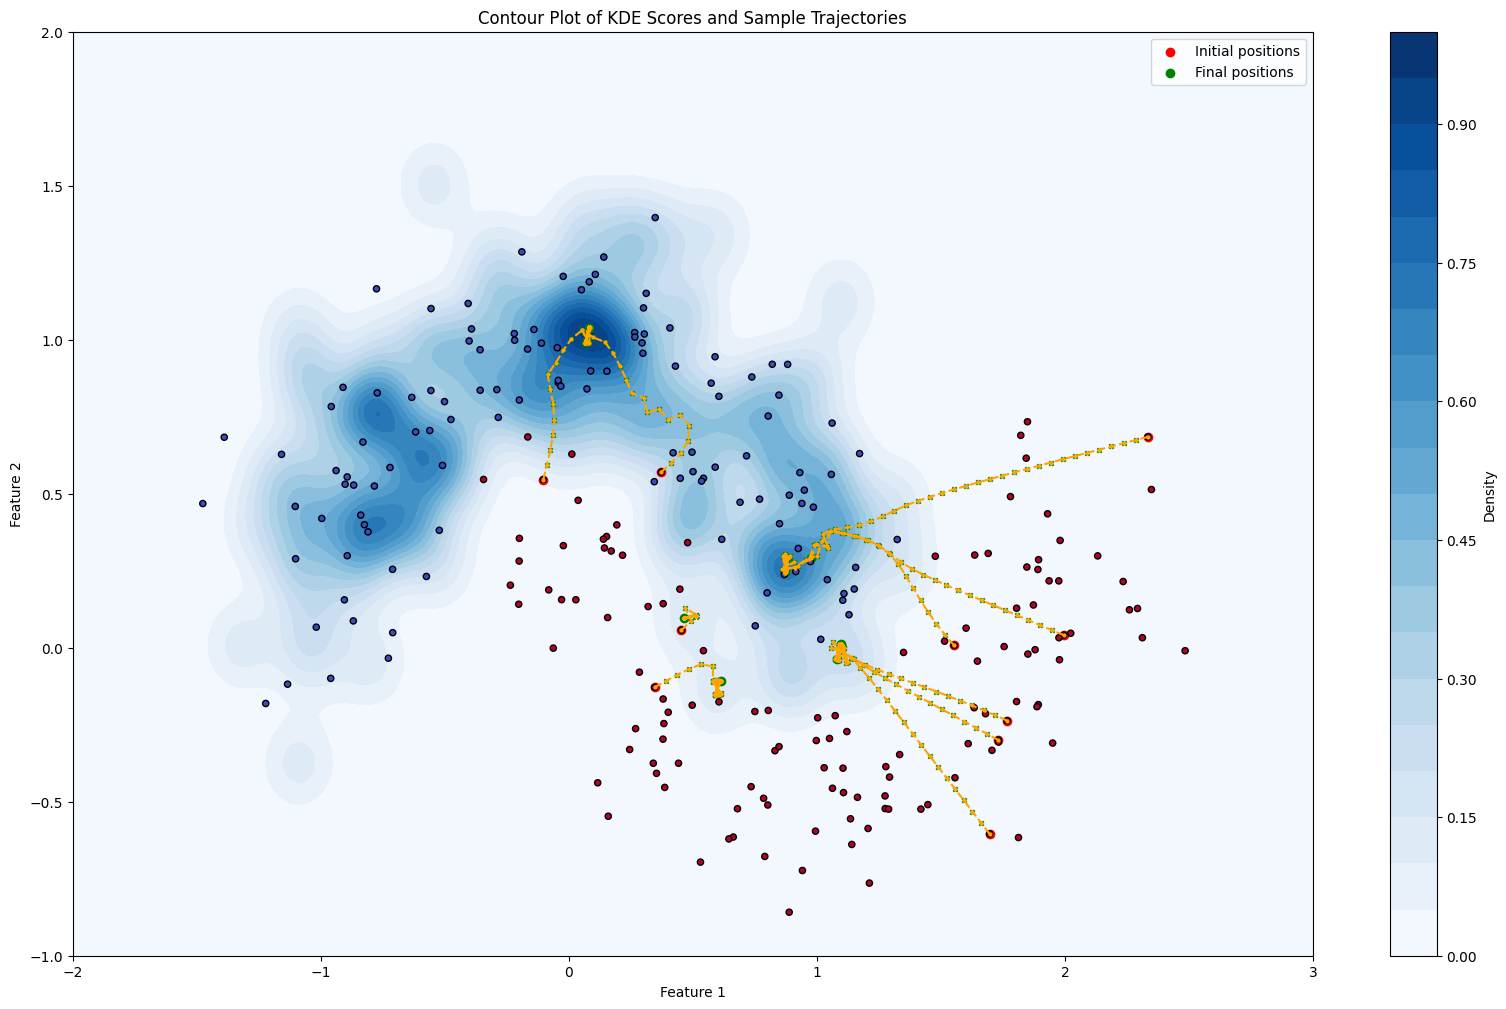

In [39]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][10:20], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.05, k=30, norm='l2')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)
for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


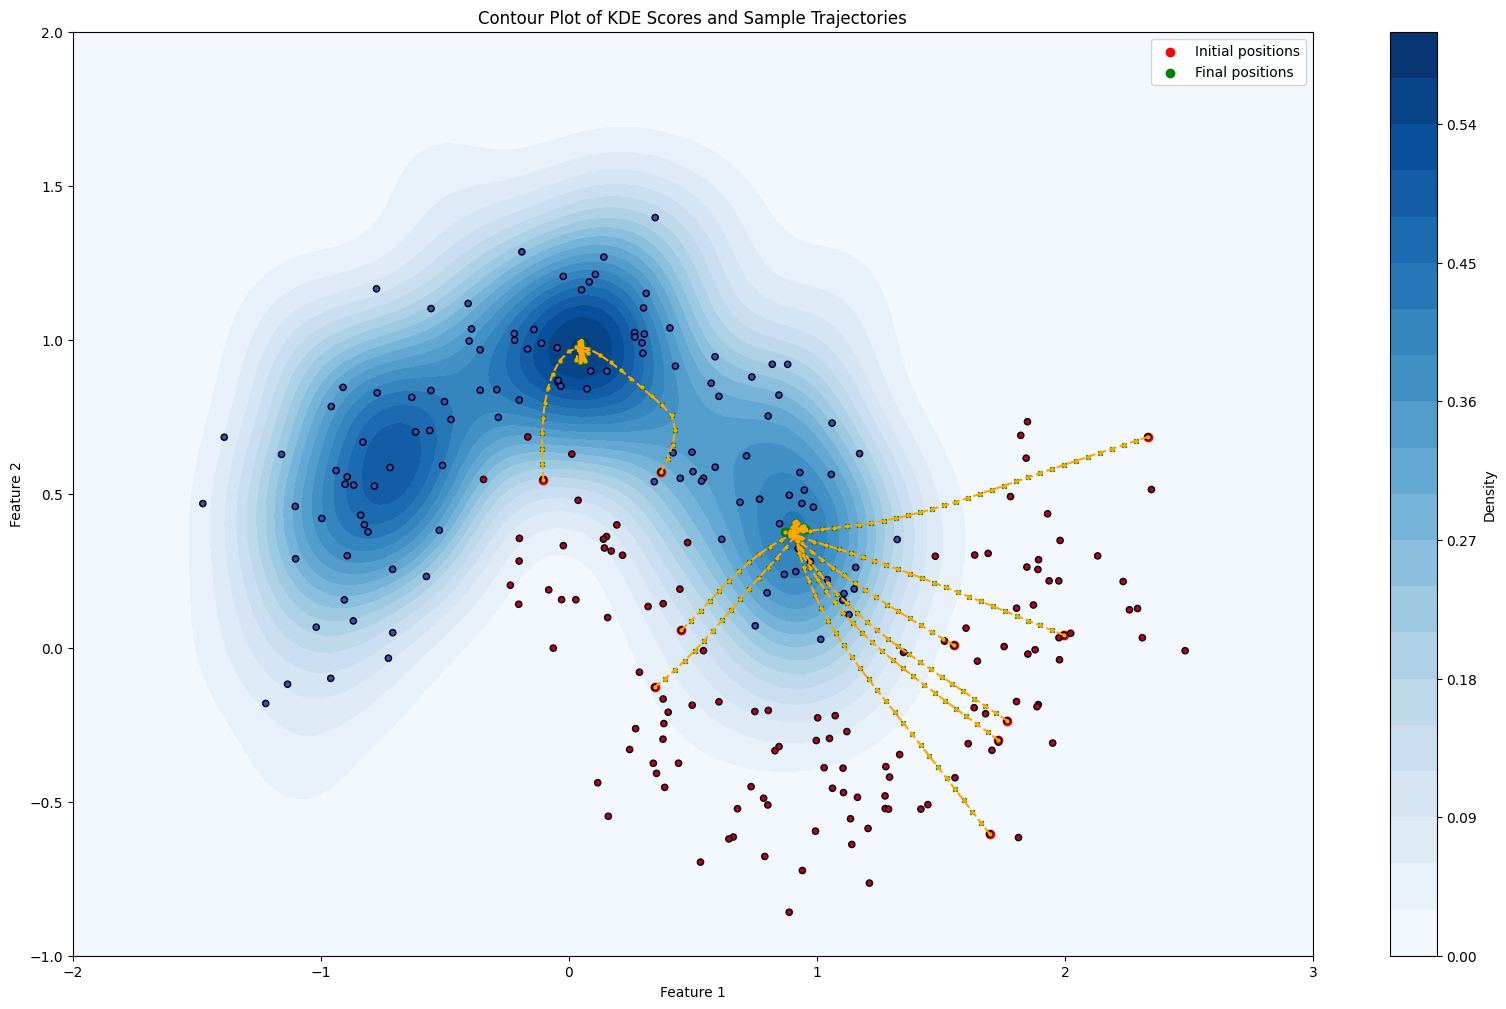

In [41]:
# Fit KDE model for benign class
bandwidth = 0.2
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][10:20], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.05, k=30, norm='l2')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)
for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


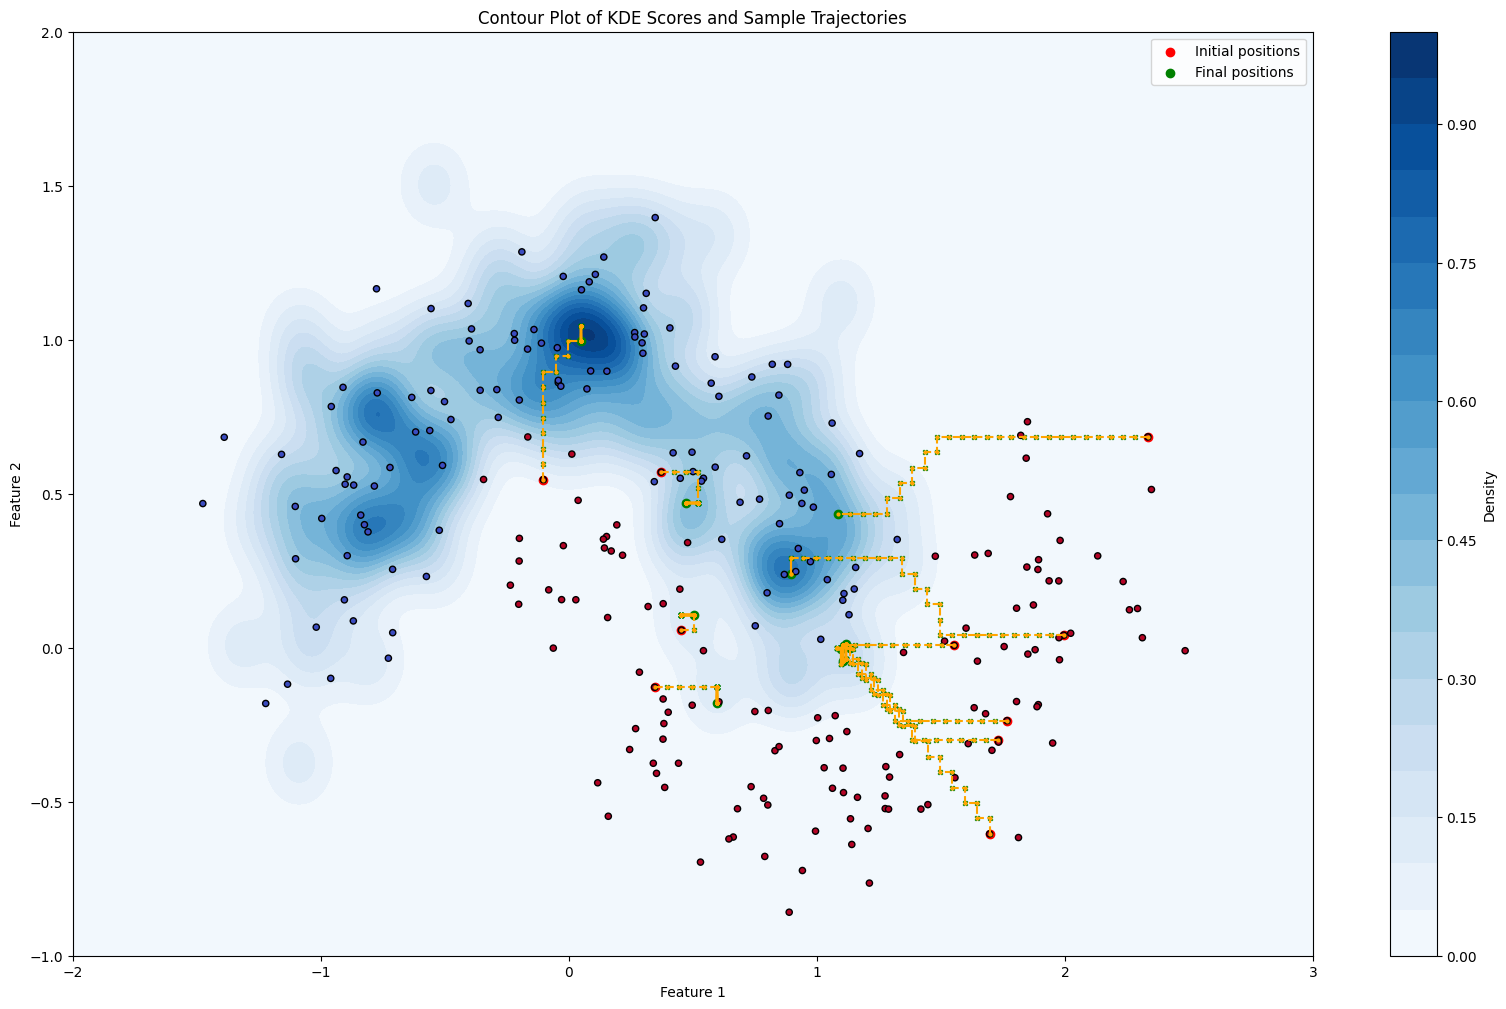

In [40]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][10:20], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.05, k=30, norm='l1')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)
for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


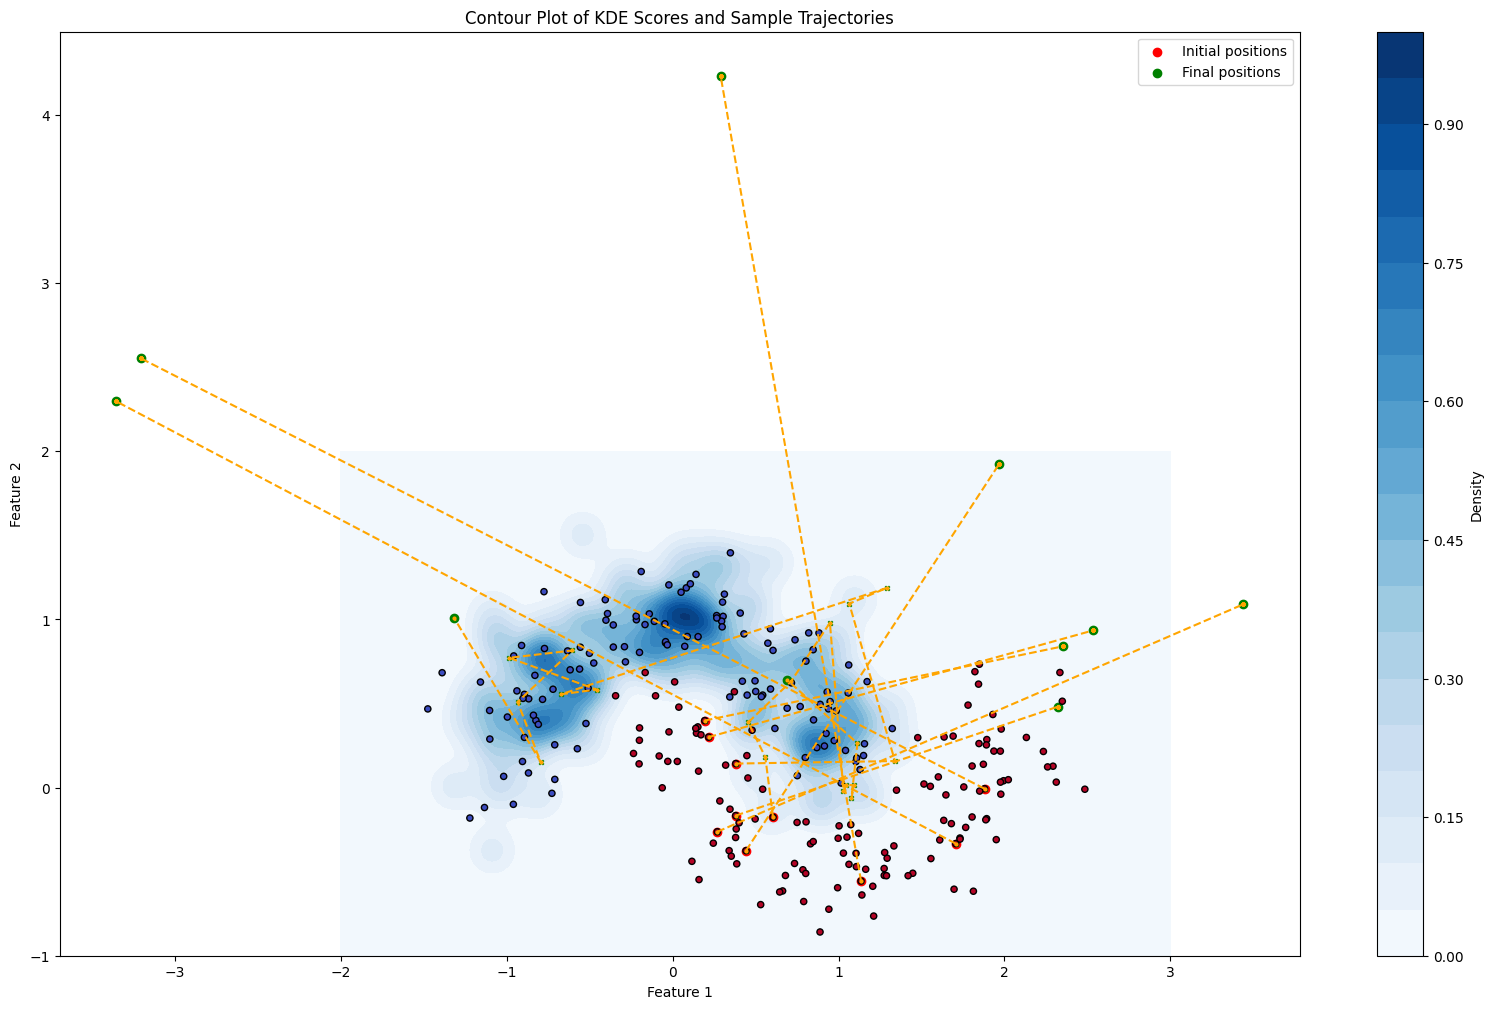

In [42]:
# Fit KDE model for benign class
bandwidth = 0.1
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='gaussian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:10], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=1., k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial and final positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the trajectories of the samples
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)
for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


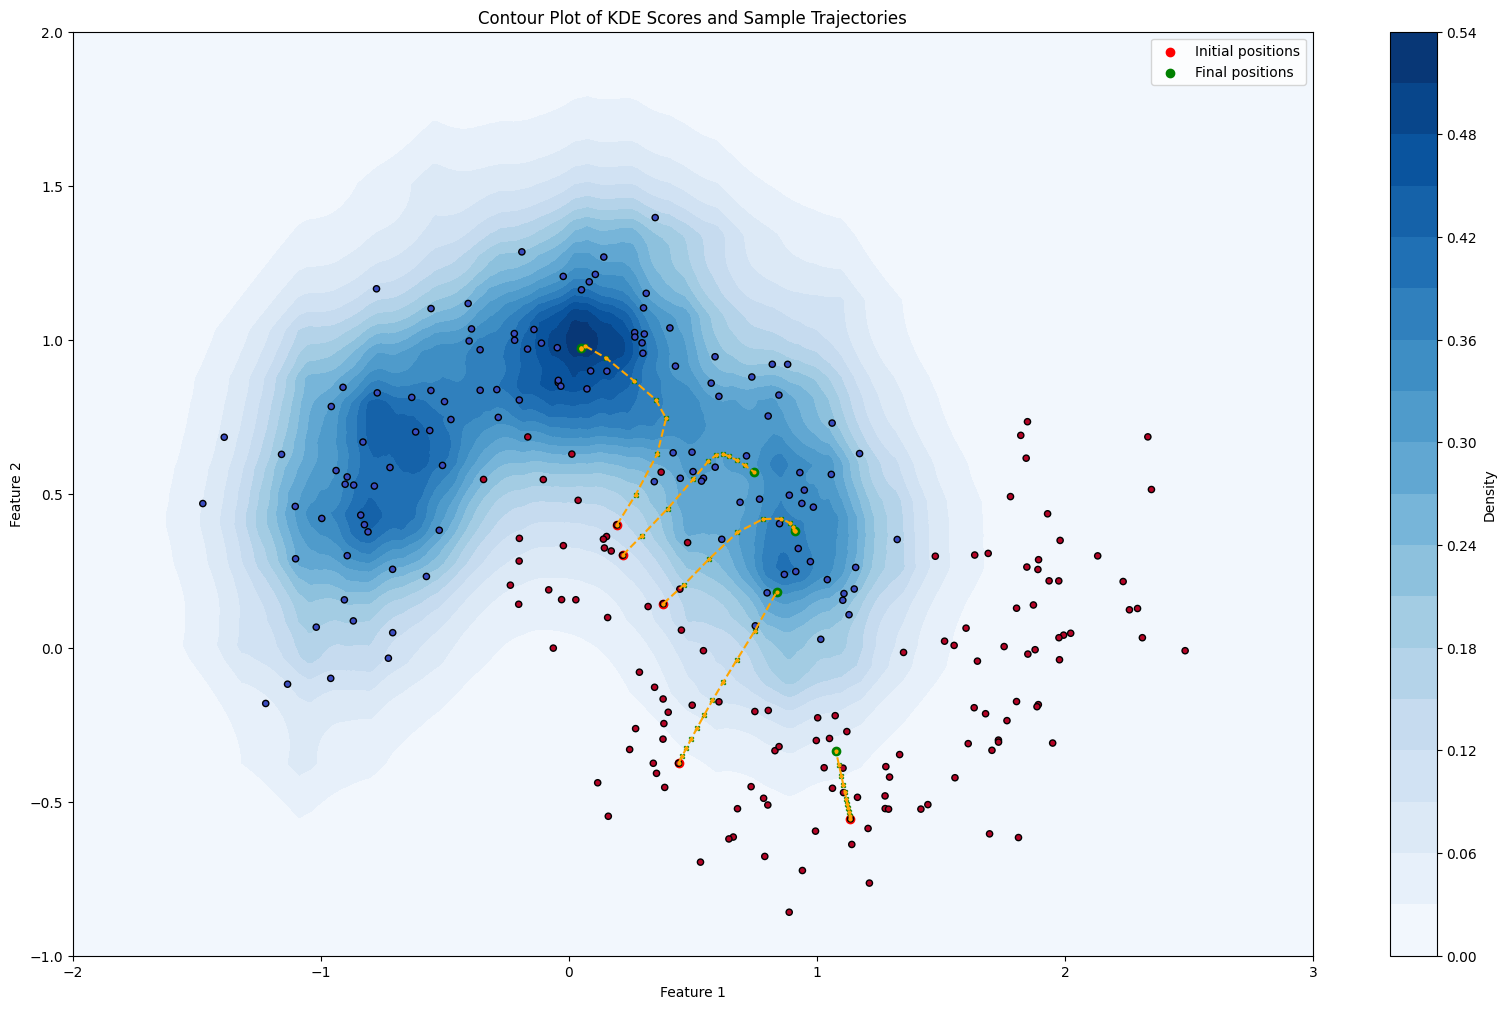

In [43]:
# Fit KDE model for benign class
bandwidth = 0.2
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='laplacian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:5], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'linear', bandwidth, 'gaussian', step_length=1., k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the new positions of the samples at each step
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

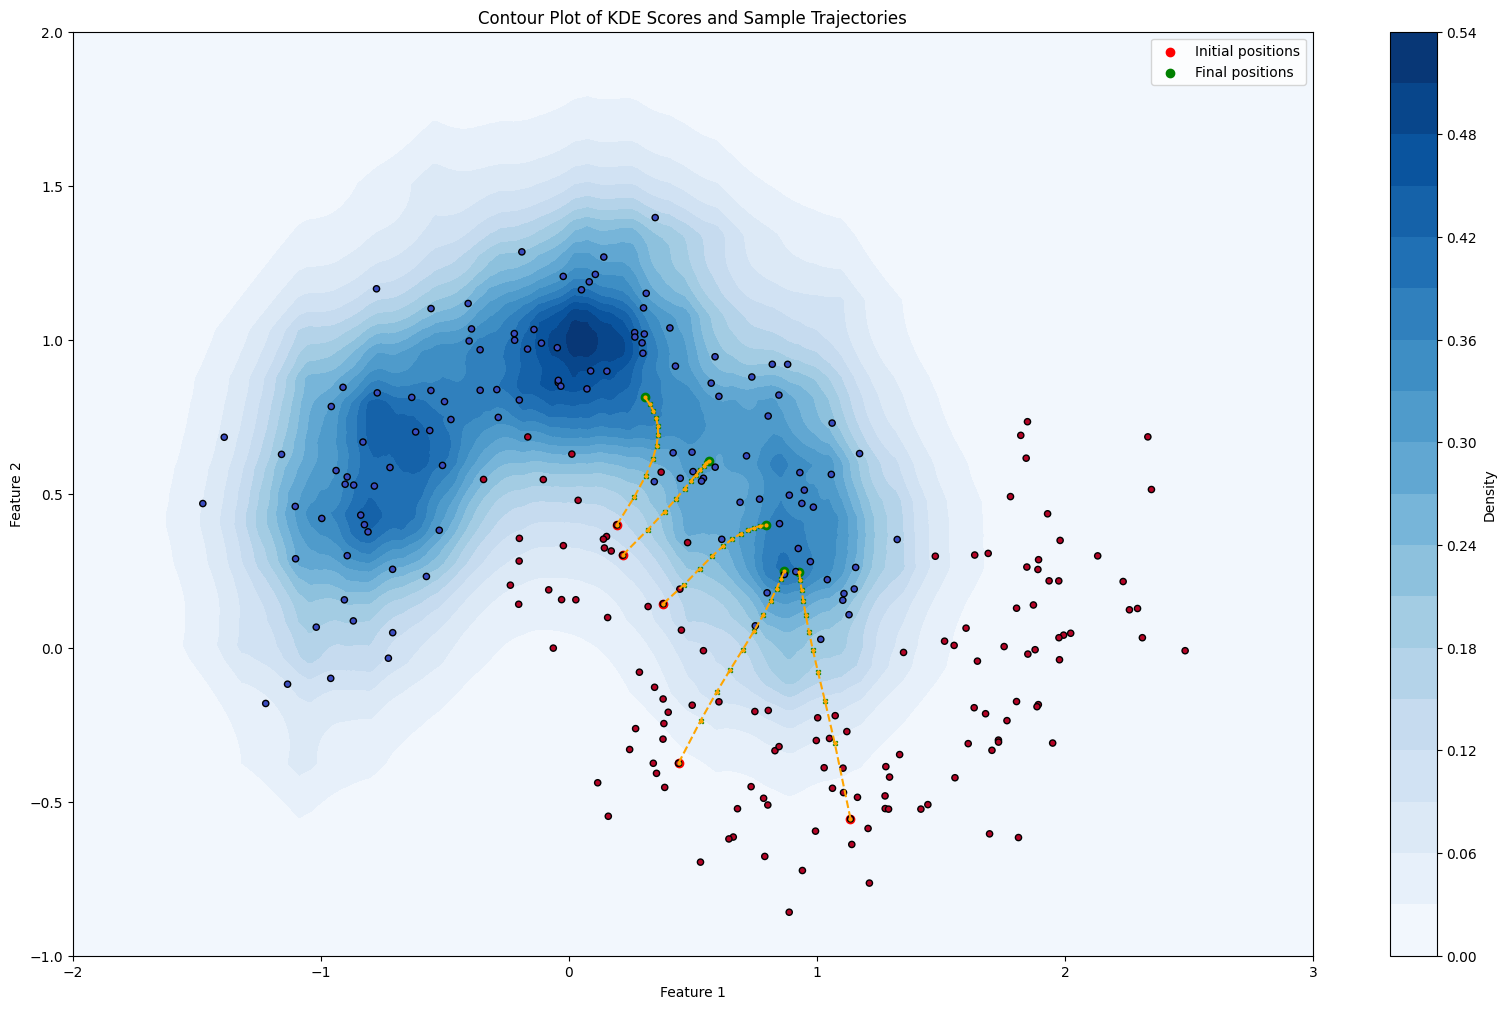

In [44]:
# Fit KDE model for benign class
bandwidth = 0.2
centers_benign = X_train_tensor[y_train == 0]

# Create a mesh grid
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 500), torch.linspace(-1, 2, 500))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Compute density estimates for the grid points using the improved KDE function
dens_benign_grid = KDE(grid, centers_benign, bandwidth, kernel='laplacian')
dens_benign_grid = dens_benign_grid.reshape(xx.shape).detach().numpy()

# Select a few samples to track their movement
mals = torch.tensor(X_test[y_test == 1][:5], dtype=torch.float32)

# Perform PGD
x_next, loss_steps_i, trajectories = pgd(mals, X_train_tensor[y_train == 0], 'log', bandwidth, 'gaussian', step_length=0.1, k=10, norm='free')

# Plot the contour of the KDE score
plt.figure(figsize=(20, 12))
plt.contourf(xx.numpy(), yy.numpy(), dens_benign_grid, levels=20, cmap='Blues')
plt.colorbar(label='Density')

# Plot the initial positions of the samples
plt.scatter(mals[:, 0], mals[:, 1], color='red', label='Initial positions')
plt.scatter(x_next[:, 0].detach().numpy(), x_next[:, 1].detach().numpy(), color='green', label='Final positions')

# Plot the new positions of the samples at each step
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], color='orange', linestyle='--', marker='o', markersize=2)

for traj in trajectories:
    plt.scatter(traj[:, 0], traj[:, 1], color='green', marker='x', s=10)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap='coolwarm')
plt.title("Contour Plot of KDE Scores and Sample Trajectories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#Centers